# Connect to comet

In [2]:
# # import comet_ml at the top of your file
# from comet_ml import Experiment

# # Create an experiment with your api key
# experiment = Experiment(
#     api_key="ZMIjNBttB9ueClB4Ovm4gHOsa",
#     project_name="thesis-test1-parallel-CNN",
#     workspace="loesverhaeghe",
#     log_code=True,
#     auto_metric_logging=True,
#     auto_param_logging=True,
#     log_graph=True,
#     auto_metric_step_rate=True,
#     parse_args=True,
#     auto_histogram_weight_logging=True,
#     auto_histogram_gradient_logging=True,
#     auto_histogram_activation_logging=True,
#     auto_histogram_epoch_rate=True,
# )


# Run model in WEST

In [3]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import os
import pandas as pd

import subprocess

import plotly.tools as tls
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import plotly
import plotly.graph_objs as go

import math  
import sklearn.metrics 

import random

# Set the seed to a specific value
random.seed(42)


In [4]:
# # note: don't change any double backslashes (\\) to slashes (\) when you copy your local paths instead of the ones here
# # so if your local path is C:\model\project in this file you should put it as C:\\model\\project

# # this is the path to the West installation files
# path_to_west = "C:\\Program Files (x86)\\DHI\\WEST\\2022"

# # this is the path to the West project, the batch file should be created in the same directory as model files
# path_to_project = "C:\\Users\\Public\\Documents\\DHI\\WEST\\2022\\data\\projects\\data_gamze - ORIGINEEL\\pilEAUte model_Oct2022\\pilEAUte_model_ver04"

# # this will read all .Dynamic.ObjEval.Exp.xml files in your directory and make a list out of their names
# # useful if you have multiple of them for more scenarios (if you use scenarios withh different parameters for example)
# # the assumption is that you have already gone through the procedure for making .Dynamic.ObjEval.Exp.xml files 
# # for scenarios based on the parameters that need to be changed
# exp_filenames = []
# for files in os.listdir(path_to_project):
#     if files.endswith(".Dynamic.ObjEval.Exp.xml"):
#             exp_filenames.append(files)

# # print to see if it works
# print(exp_filenames) 

# # here the batch file will be created
# windows_batch_file = os.path.join(path_to_project, "run_model.bat")        

# # open the batch file and write the lines inside it
# fbat = open(windows_batch_file, "w")
# fbat.write("SET INCLUDE=%INCLUDE%;"+path_to_west+"\include\n")
# fbat.write("SET LIB=%LIB%;"+path_to_west+"\lib\win32-msvc\n")
# fbat.write("SET PATH="+path_to_west+"\\bin;"+path_to_west+"\\third_party\\bcc5.5\Bin;%PATH%\n")
# fbat.write("SET TORNADO_CC_PLATFORM=win32-bcc5.5\n")
# fbat.write("SET TORNADO_CC_PATH="+path_to_west+"\\third_party\\bcc5.5\n")
# fbat.write("SET TORNADO_DATA_PATH=C:\\Users\\Public\\Documents\\DHI\\WEST\\2022\n")
# fbat.write("SET TORNADO_ROOT_PATH="+path_to_west+"\n")
# fbat.write("SET OPENMODELICAHOME="+path_to_west+"\\bin\n")

# up to here, the previous lines are for your machine to know where tornado files are stored

In [5]:
##########################################################################
# read this part only if you need to use tbuild command 
# for creating model files to run on linux (like for running on a cluster)
##########################################################################

# example for tbuild command, xxx is the path to the model block library, 
# you should keep External\External at the end of this path, just change the previous part 
# for example it should be something like this: C:\example\blocks\MSL\External\External
# _ProjectName_ is only the name of the project and not the complete path, the complete
# path is not required since you are already in the directory of the project

# fbat.write("tbuild -S C:\\Users\\sdaneshg\\OneDrive - UGent\\Desktop\\WEST_model_latest update\\WEST_model\\WEST\\data\\blocks\\WESTforKALLISTO - InfluentModel\\External\\External -B ”” _Influent_ > tbuild.log\n")

In [6]:

# ##########################################################################
# # this part is realted to using texec for running simulations
# ##########################################################################

# # EXPLANATION if you need to run tbuild first 
# # when you first run this batch script, keep this line as a comment
# # you need to run the tbuild first
# # after you run this with tbuild command successfully then open this file again
# # and comment the fbat.write("tbuild...") line and uncomment the line below
# # then run the script again to create batch file fo simulations

# # log_filename is the name of the log file (with .log extension) that you choose to save
# # exp_filename is the .Dynamic.ObjEval.Exp.xml file you have in your project directory
# # these two should be only names and not full path, you don't need the full path here
# # output_name_orig is the name of the output file you choose to save in WEST environment
# # this should work even if you have multiple ObjEval files for example: scen_1.Dynamic.ObjEval.Exp.xml, scen_2.Dynamic.ObjEval.Exp.xml , ...
# # this will create a texec command for each scenario to run and then rename the output file accordingly 
# # so they will not be overwritten

# output_name_orig = "testausel25_06.Dynamic.Simul.1.out.testLoes.txt" # this is how I named the output file created in WEST

# # This writes the lines to create the log-file and run the model
# for f in exp_filenames:
#     log_filename = f.split('.')[0] + ".log"
#     new_output_name = f.split('.')[0] + ".out.txt"
#     fbat.write("texec -l \"" + log_filename  + "\" \"" + f+"\"\n")
#     fbat.write("ren \"" + output_name_orig + "\" \"" + new_output_name +"\"\n")

# # write exit and close the file
# fbat.write("EXIT")
# fbat.close()

In [7]:
# When you use parallel model this doesn't have to be run everytime

# # run the command line of your computer inside python to run the batch file
# # this might take a while as the model runs
# os.chdir(path_to_project)
# p = subprocess.Popen("run_model.bat" , shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
# p.communicate()            

In [8]:
# define a function that can interpolate the data to the measurement data time points
def interp(df, new_index):
    """Return a new DataFrame with all columns values interpolated to the new_index values."""
    df_out = pd.DataFrame(index=new_index)
    df_out.index.name = df.index.name

    for colname, col in df.iteritems():
        df_out[colname] = np.interp(new_index, df.index, col)

    return df_out

# Import measurement data 

In [9]:
interpol_index=np.linspace(0,58.9208, num=8352) # every 10 minutes
interpol_index

array([0.00000000e+00, 7.05553826e-03, 1.41110765e-02, ...,
       5.89066889e+01, 5.89137445e+01, 5.89208000e+01])

In [52]:
# set the path the the data file in my computer
measured_data_path="C:\\Users\\Public\\Documents\\DHI\\WEST\\2022\\data\\projects\\data_gamze - ORIGINEEL\\pilEAUte model_Oct2022\\InputOutput\\Measured_data_5_tank_model_rev2.txt"

# read the file and delete unwanted columns
measured_data=pd.read_csv(measured_data_path, sep="\t", header=[2], low_memory=False)
measured_data=measured_data.drop(0)
measured_data=measured_data.drop(1)
measured_data=measured_data.set_index('t')
measured_data = measured_data.astype(float)

measured_data=interp(measured_data, interpol_index)

display(measured_data)

,.ASU_2.X_TSS,.SST_1.X_Under,.ASU_4.C(S_O),Temp,.Qair_Basin_4,.SST_1.C(S_NH)(1),.SST_1.C(S_NO3)(1),.SST_1.X_Out
t,,,,,,,,
0.000000,3136.849400,6256.418700,3.000000,20.290100,331.000000,0.1,6.995200,0.000000
0.007056,3136.869454,6256.418700,3.000000,20.296348,328.009672,0.1,6.994067,0.000000
0.014111,3128.331916,6256.418700,3.000000,20.301719,326.718397,0.1,7.000284,0.000000
0.021167,3126.789291,6256.418700,3.000000,20.306691,324.633852,0.1,6.992770,0.000000
0.028222,3130.675766,6258.759449,3.000000,20.310339,321.077595,0.1,6.973500,0.000000
...,...,...,...,...,...,...,...,...
58.892578,1229.154052,2956.535141,2.995540,17.991867,101.933630,0.0,0.000000,4.650252
58.899633,1227.908619,2944.561855,2.999213,17.997647,101.000000,0.0,0.000000,4.345851
58.906689,1234.572933,2943.567400,2.994865,18.000137,102.000000,0.0,0.000000,4.582997


In [11]:
# # quick look at the measurement data
# measured_data.iplot(kind='scatter',filename='cufflinks/simple-scatter',mode='lines', size=4,legend=True)

# Import mechanistic model outputs 

In [12]:
# Set path to files
output_name=r"C:\Users\Public\Documents\DHI\WEST\2022\data\projects\data_gamze - ORIGINEEL\pilEAUte model_Oct2022\pilEAUte_model_ver04\testausel25_06.out_metlayer1.txt"

# Import files
mech_model_output_data=pd.read_csv(output_name, sep="\t",header=[0], low_memory=False)
mech_model_output_data=mech_model_output_data.drop(0)
mech_model_output_data=mech_model_output_data.drop(mech_model_output_data.index[-1])
mech_model_output_data=mech_model_output_data.set_index('#.t')
mech_model_output_data = mech_model_output_data.astype(float)

# interpolate the mechanistic output data to the timesteps of the measured data
mech_model_output_data=interp(mech_model_output_data, interpol_index)

display(mech_model_output_data)

,.ASU_2.X_TSS,.ASU_4.C(S_O),.Qair_Basin_4,.SST_1.C(S_NH)(1),.SST_1.C(S_NO3)(1),.SST_1.X_Layer(1),.SST_1.X_Out,.SST_1.X_Under
#.t,,,,,,,,
0.000000,2262.953200,3.000153,94.970918,0.242932,8.170881,6.395013,6.395013,4375.893200
0.007056,2262.409742,2.211630,249.954050,0.242934,8.170891,6.395038,6.395038,4375.935987
0.014111,2261.507608,2.193822,260.536726,0.242932,8.170894,6.395066,6.395066,4381.122029
0.021167,2260.596888,2.206032,265.364644,0.242924,8.170889,6.395309,6.395309,4401.119428
0.028222,2260.069914,2.213453,271.013973,0.242909,8.170877,6.396849,6.396849,4428.098425
...,...,...,...,...,...,...,...,...
58.892578,2069.616596,2.977911,213.549330,0.245944,3.749138,8.009434,8.009434,4102.389164
58.899633,2069.654676,2.977599,213.807363,0.244234,3.747658,8.009518,8.009518,4102.441812
58.906689,2069.694820,2.977274,214.070675,0.242527,3.744804,8.009628,8.009628,4102.499276


In [13]:
# # quick look at the data
# mech_model_output_data.iplot(kind='scatter',filename='cufflinks/simple-scatter',mode='lines', size=4,legend=True)

## Compare measurement and output mechanistic model

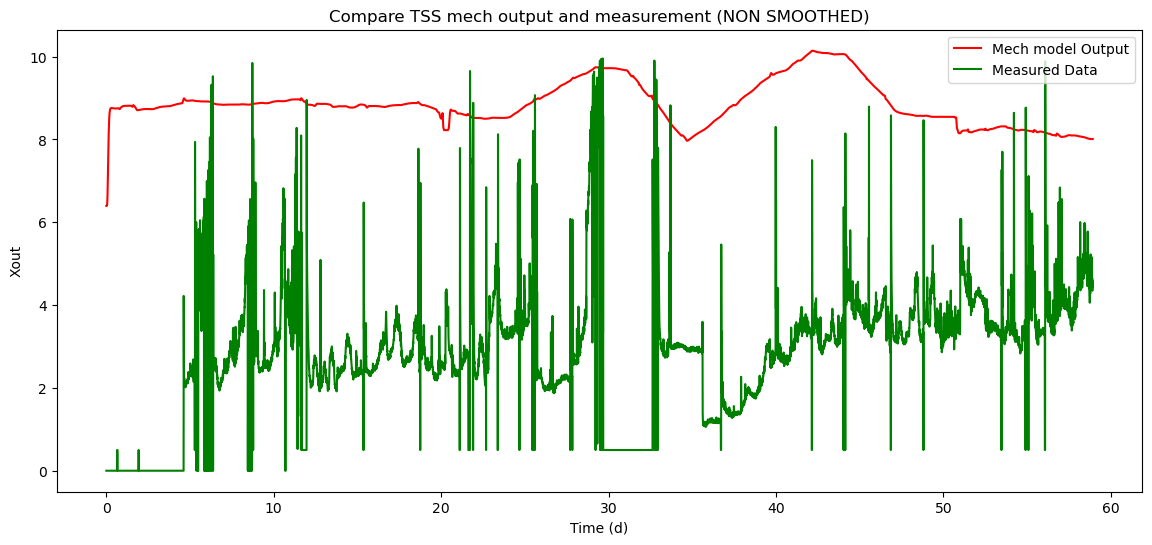

In [14]:
import matplotlib.pyplot as plt

mech=mech_model_output_data
measured=measured_data

figure(figsize=(14,6))
plt.plot(mech['.SST_1.X_Layer(1)'], color='r', label='Mech model Output')
plt.plot(measured['.SST_1.X_Out'], 'g', label='Measured Data')
plt.ylabel('Xout')
plt.xlabel('Time (d)')
plt.legend(loc='best')
plt.title('Compare TSS mech output and measurement (NON SMOOTHED)')
plt.show()


In [15]:
# import smoothed SST TSS out

# Set path to files
TSS_OUT_output_name=r"C:\Users\Hoofdgebruiker\Development\data_filters\data\effluent_.SST_1.X_Out_filtered.csv"


# Import files
TSS_OUT=pd.read_csv(TSS_OUT_output_name, header=[0])['smoothed'] 
TSS_OUT=np.array(TSS_OUT.interpolate(method='linear', limit_direction='both'))
    
measured_data['.SST_1.X_Out'] = TSS_OUT

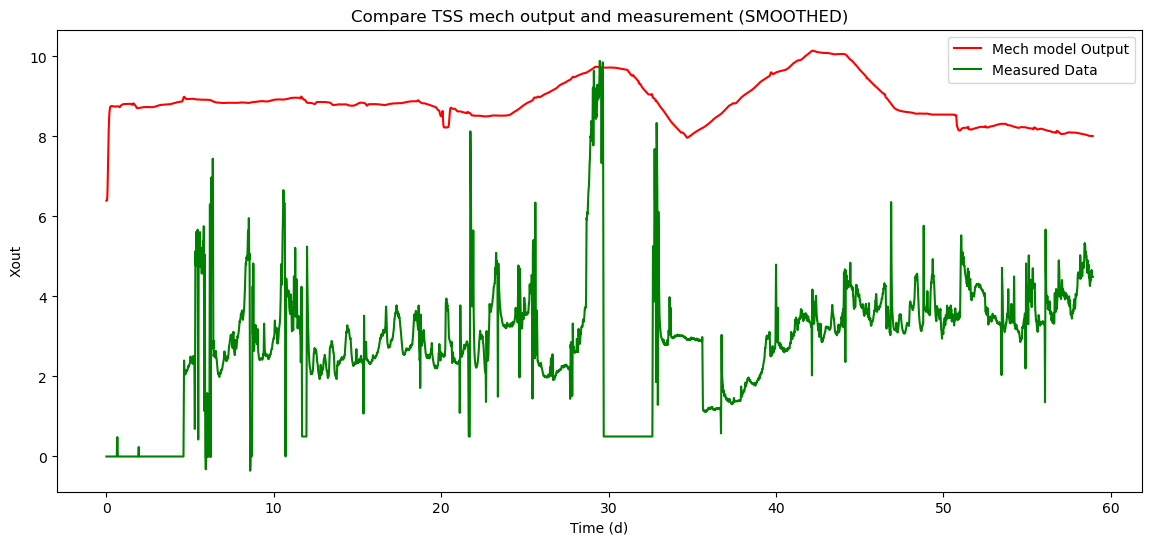

In [16]:
import matplotlib.pyplot as plt

mech=mech_model_output_data
measured=measured_data

figure(figsize=(14,6))
plt.plot(mech['.SST_1.X_Layer(1)'], color='r', label='Mech model Output')
plt.plot(measured['.SST_1.X_Out'], 'g', label='Measured Data')
plt.ylabel('Xout')
plt.xlabel('Time (d)')
plt.legend(loc='best')
plt.title('Compare TSS mech output and measurement (SMOOTHED)')
plt.show()

#  Import influent data (non fractionated)


In [17]:
# Set path to file
influent_data_path=r"C:\Users\Hoofdgebruiker\THESIS\influent_variabelen_doorGamzegesmooth.txt"

# Import file
influent_data0=pd.read_csv(influent_data_path, sep="\t", header=[0])
influent_data0=influent_data0.set_index('tijd(d)')
influent_data0 = influent_data0.astype(float)

# interpolate the influent data to the timesteps of the measured data
influent_data0=interp(influent_data0, interpol_index)

# Set path to file
Qair_data_path="C:\\Users\\Public\\Documents\\DHI\\WEST\\2022\\data\\projects\\data_gamze - ORIGINEEL\\pilEAUte model_Oct2022\\nieuwe_data_Loes\\Qair.txt"

# Import file
Qair_data=pd.read_csv(Qair_data_path, sep="\t", header=[2])
Qair_data=Qair_data.drop(0)
Qair_data=Qair_data.drop(1)
Qair_data=Qair_data.set_index('t ')
Qair_data = Qair_data.astype(float)

# interpolate the influent data to the timesteps of the measured data
Qair_data=interp(Qair_data, interpol_index)

# Set path to file
temp_data_path=data_filepath=r"C:\Users\Hoofdgebruiker\Development\data_filters\data\influent_data_Temp_filtered.csv"

# Import file
temp_data=pd.read_csv(temp_data_path, header=[0])['smoothed']
temp_data=np.array(temp_data.interpolate(method='linear', limit_direction='both'))

# create the training dataset: I used all the influent data plus the error in this script
influent_data=influent_data0.copy()
influent_data.insert(0, 'Qair', Qair_data)
influent_data.insert(0, 'Temp', temp_data)
display(influent_data)

,Temp,Qair,CODs_prim_infl,NH4_prim_infl,CODt_prim_infl,TSS_prim_infl,pH_prim_infl
tijd(d),,,,,,,
0.000000,20.301446,331.000000,147.168229,54.214033,396.877641,82.196048,7.550000
0.007056,20.301446,325.240122,145.926208,53.996000,388.654770,83.089431,7.539400
0.014111,20.301446,324.853530,143.419752,53.729801,381.349876,81.713018,7.532199
0.021167,20.307025,321.373821,141.858808,53.321340,378.993129,81.472128,7.509301
0.028222,20.312737,319.786870,141.456084,52.863486,376.778210,80.734739,7.517699
...,...,...,...,...,...,...,...
58.892578,17.954180,102.312099,194.531516,21.189862,312.157207,49.569675,7.440000
58.899633,17.956967,103.832428,194.531516,21.189862,312.157207,49.569675,7.440000
58.906689,17.960114,103.264108,194.531516,21.189862,312.157207,49.569675,7.440000


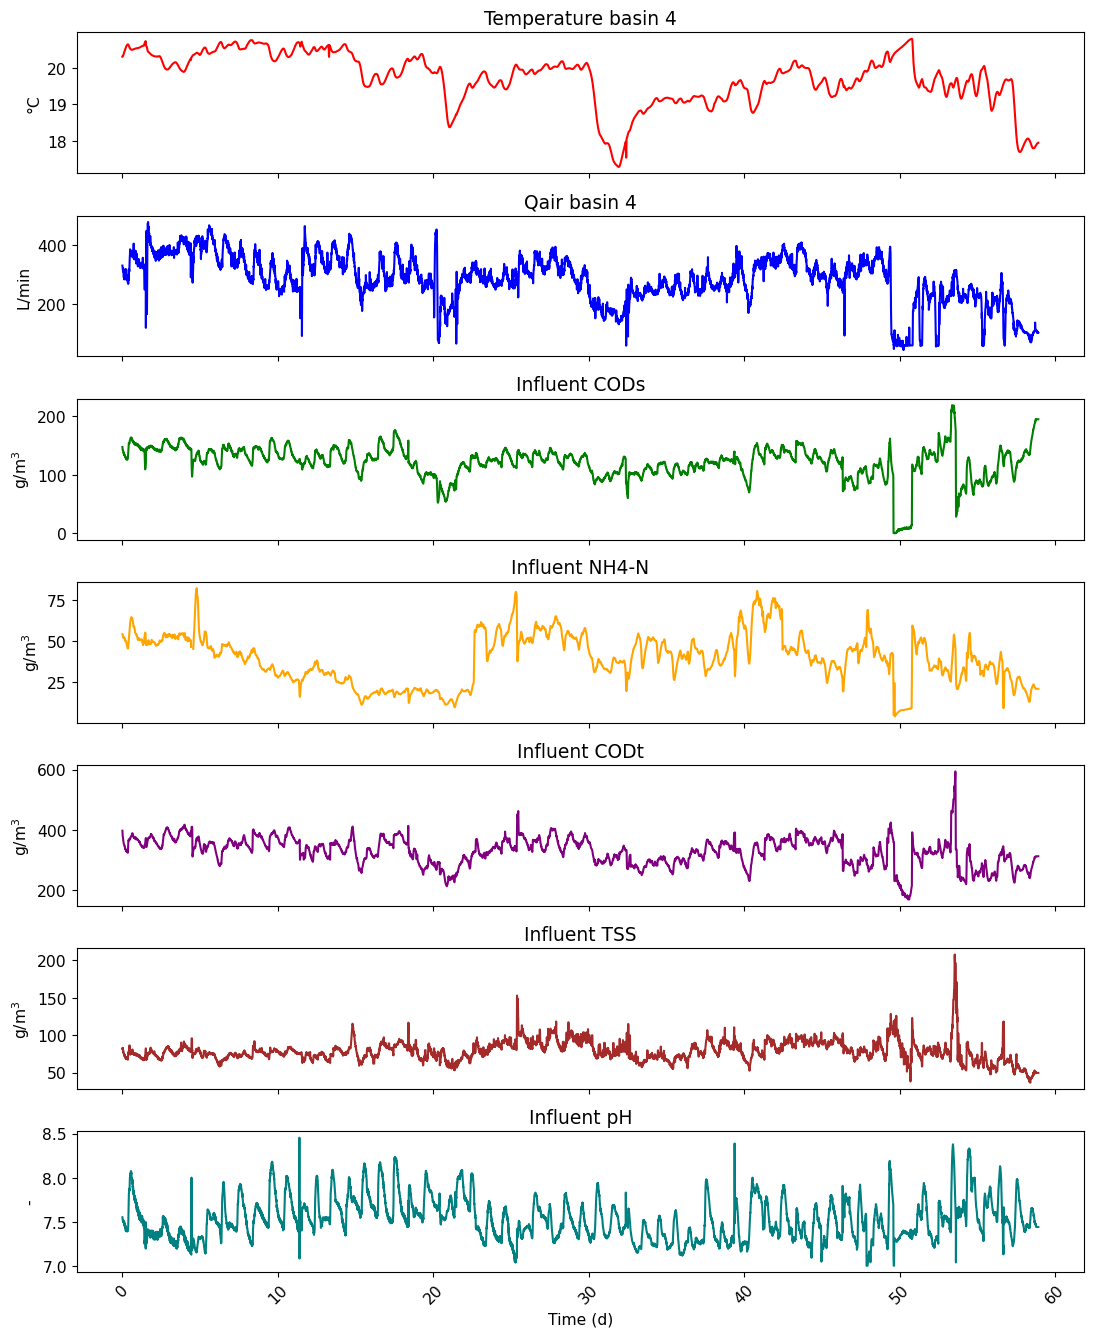

In [59]:
import matplotlib.pyplot as plt

variables = ['Temp', 'Qair', 'CODs_prim_infl', 'NH4_prim_infl', 'CODt_prim_infl', 'TSS_prim_infl', 'pH_prim_infl']
names = ['Temperature basin 4', 'Qair basin 4', 'Influent CODs', 'Influent NH4-N', 'Influent CODt', 'Influent TSS', 'Influent pH']
ylabels = ['°C', 'L/min', 'g/m$^3$', 'g/m$^3$', 'g/m$^3$', 'g/m$^3$', '-']
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'teal']  # Een lijst van kleuren voor elke grafiek

# Creëer de subplots
fig, axs = plt.subplots(len(variables), 1, figsize=(13, 2.3*len(variables)), sharex=True)

# Loop door elke variabele en plot deze in een aparte subplot
for i, variable in enumerate(variables):
    axs[i].plot(influent_data.index, influent_data[variable], color=colors[i])  # Geef elke grafiek een ander kleurtje
    axs[i].set_ylabel(ylabels[i])  # Gebruik de eenheden als ylabel
    axs[i].set_title(names[i])  # Gebruik de naam als titel
    axs[i].tick_params(axis='x', rotation=45)

# Stel de titel van de x-as in
axs[-1].set_xlabel('Time (d)')

plt.subplots_adjust(hspace=0.3)

# Laat de figuren zien
plt.show()

#  TSS prediction

## Prepare the data for model input

In [18]:
from keras.models import Sequential
from keras.layers import LSTM, SimpleRNN
from keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from tensorflow.keras.optimizers import Adam, SGD 
import tensorflow as tf
from tensorflow import keras
import keras_tuner
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Conv2D, MaxPooling2D

In [19]:
# Create error = error that the mechanistic model makes at each timestep
error_for_training=measured_data['.SST_1.X_Out']-mech_model_output_data['.SST_1.X_Layer(1)']
error_for_training.describe()

count    8352.000000
mean       -6.044510
std         1.626905
min        -9.238354
25%        -6.971492
50%        -6.034772
75%        -5.047794
max         0.155754
dtype: float64

In [20]:
# create the training dataset: I used all the influent data plus the error in this script
df_for_training=influent_data.copy()
df_for_training.insert(0, 'error_TSS', error_for_training)
TSS=mech_model_output_data['.SST_1.X_Layer(1)']
df_for_training.insert(1, 'TSS_mech', TSS)

display(df_for_training)

,error_TSS,TSS_mech,Temp,Qair,CODs_prim_infl,NH4_prim_infl,CODt_prim_infl,TSS_prim_infl,pH_prim_infl
tijd(d),,,,,,,,,
0.000000,-6.395013,6.395013,20.301446,331.000000,147.168229,54.214033,396.877641,82.196048,7.550000
0.007056,-6.395038,6.395038,20.301446,325.240122,145.926208,53.996000,388.654770,83.089431,7.539400
0.014111,-6.395066,6.395066,20.301446,324.853530,143.419752,53.729801,381.349876,81.713018,7.532199
0.021167,-6.395309,6.395309,20.307025,321.373821,141.858808,53.321340,378.993129,81.472128,7.509301
0.028222,-6.396849,6.396849,20.312737,319.786870,141.456084,52.863486,376.778210,80.734739,7.517699
...,...,...,...,...,...,...,...,...,...
58.892578,-3.503634,8.009434,17.954180,102.312099,194.531516,21.189862,312.157207,49.569675,7.440000
58.899633,-3.514686,8.009518,17.956967,103.832428,194.531516,21.189862,312.157207,49.569675,7.440000
58.906689,-3.520185,8.009628,17.960114,103.264108,194.531516,21.189862,312.157207,49.569675,7.440000


In [21]:
# Split the dataset
# trainX_temp=df_for_training[33120:66241] # calibration dataset Gamze
# validationX_temp=df_for_training[66240:76240] # half of the validation dataset Gamze
# testX_temp=df_for_training[76240:] # half of the validation dataset Gamze

tr1=48
tr2=59

v1=24
v2=47

te1=5
te2=24

trainX_temp=df_for_training.loc[tr1:tr2] #calib and half of valid
validationX_temp=df_for_training.loc[v1:v2] 
testX_temp=df_for_training.loc[te1:te2] 

trainX_temp

,error_TSS,TSS_mech,Temp,Qair,CODs_prim_infl,NH4_prim_infl,CODt_prim_infl,TSS_prim_infl,pH_prim_infl
tijd(d),,,,,,,,,
48.005882,-4.766744,8.604024,19.971632,340.815469,85.333424,59.638907,262.587853,66.504008,7.130000
48.012938,-4.748098,8.603546,19.980478,337.046861,84.760759,58.686406,261.105332,66.224053,7.130000
48.019993,-4.730241,8.603054,19.989833,329.071452,85.144319,57.943765,261.253923,65.905301,7.131548
48.027049,-4.726100,8.602550,19.999788,340.632428,85.606078,57.278317,265.081905,68.487725,7.159252
48.034104,-4.734498,8.602033,20.010050,331.249892,85.485331,56.705832,268.550391,69.897109,7.160000
...,...,...,...,...,...,...,...,...,...
58.892578,-3.503634,8.009434,17.954180,102.312099,194.531516,21.189862,312.157207,49.569675,7.440000
58.899633,-3.514686,8.009518,17.956967,103.832428,194.531516,21.189862,312.157207,49.569675,7.440000
58.906689,-3.520185,8.009628,17.960114,103.264108,194.531516,21.189862,312.157207,49.569675,7.440000


In [22]:
# Scale the datasets, here I only scaled the influent data, not the error
scaler1=StandardScaler()
train_transformed=scaler1.fit_transform(trainX_temp.loc[:, trainX_temp.columns!= 'error_TSS'])
scaler2=StandardScaler()
val_transformed=scaler2.fit_transform(validationX_temp.loc[:, validationX_temp.columns!= 'error_TSS']) 
scaler3=StandardScaler()
test_transformed=scaler3.fit_transform(testX_temp.loc[:, testX_temp.columns!= 'error_TSS']) 

trainX_scaled=np.append(np.asarray(trainX_temp['error_TSS']).reshape(len(trainX_temp),1), train_transformed, axis=1).reshape(len(trainX_temp),df_for_training.shape[1])
validationX_scaled=np.append(np.asarray(validationX_temp['error_TSS']).reshape(len(validationX_temp),1), val_transformed, axis=1).reshape(len(validationX_temp),df_for_training.shape[1])
testX_scaled=np.append(np.asarray(testX_temp['error_TSS']).reshape(len(testX_temp),1), test_transformed, axis=1).reshape(len(testX_temp),df_for_training.shape[1])

In [23]:
# Prepare traindata for training
trainX=[]
trainY=[]

n_past=30 # how much data point do you look back to make your next prediction

for i in range(n_past, len(trainX_scaled)):
    trainX.append(trainX_scaled[i-n_past:i, 1:]) # so here I did not include the errors in the training dataset
    trainY.append(trainX_scaled[i:i+1,0])
    
trainX, trainY = np.array(trainX), np.array(trainY)

# Check the shape of the traindata
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape)) # the first line of data doesn't get predicted

trainX shape == (1518, 30, 8).
trainY shape == (1518, 1).


In [24]:
# Prepare validationdataset
validationX=[]
validationY=[]

for i in range(n_past, len(validationX_scaled)):
    validationX.append(validationX_scaled[i-n_past:i, 1:]) #don't include the predicted error
    validationY.append(validationX_scaled[i:i+1,0]) # je begint dus pas te voorspellen op de n_past-ste plaats
    
validationX, validationY = np.array(validationX), np.array(validationY)

# Check the shape of the validation datasets
print('validationX shape == {}.'.format(validationX.shape))
print('validationY shape == {}.'.format(validationY.shape))

# dus validationX[0] ingeven geeft een predictie van de lijn die zal bijgevoegd worden als laatste bij validationX[1]

validationX shape == (3230, 30, 8).
validationY shape == (3230, 1).


In [25]:
# Prepare validationdataset
testX=[]
testY=[]

for i in range(n_past, len(testX_scaled)):
    testX.append(testX_scaled[i-n_past:i, 1:]) #don't include the predicted error
    testY.append(testX_scaled[i:i+1,0]) # je begint dus pas te voorspellen op de n_past-ste plaats
    
testX, testY = np.array(testX), np.array(testY)

# Check the shape of the validation datasets
print('testX shape == {}.'.format(testX.shape))
print('testY shape == {}.'.format(testY.shape))

testX shape == (2663, 30, 8).
testY shape == (2663, 1).


## Model maken

In [31]:
model = Sequential()
model.add(Conv1D(filters=12, kernel_size=6, input_shape=(trainX.shape[1], trainX.shape[2]), activation='relu'))
model.add(Dropout(0.1))
model.add(Conv1D(filters=9, kernel_size=5, activation='relu')) 
model.add(Dropout(0.1))
model.add(Conv1D(filters=6, kernel_size=3, activation='relu')) 
model.add(Dropout(0.1))
model.add(Conv1D(filters=3, kernel_size=3, activation='relu')) 
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.0002), loss='mae')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 25, 12)            588       
                                                                 
 dropout_4 (Dropout)         (None, 25, 12)            0         
                                                                 
 conv1d_5 (Conv1D)           (None, 21, 9)             549       
                                                                 
 dropout_5 (Dropout)         (None, 21, 9)             0         
                                                                 
 conv1d_6 (Conv1D)           (None, 19, 6)             168       
                                                                 
 dropout_6 (Dropout)         (None, 19, 6)             0         
                                                                 
 conv1d_7 (Conv1D)           (None, 17, 3)            

In [32]:
# Train the model
history=model.fit(x=trainX, y=trainY, validation_data=(validationX, validationY), epochs=70, batch_size=64, shuffle=False, verbose=1)

Epoch 1/70
24/24 [==============================] - 1s 16ms/step - loss: 4.1321 - val_loss: 5.8703
Epoch 2/70
24/24 [==============================] - 0s 11ms/step - loss: 3.8456 - val_loss: 5.5493
Epoch 3/70
24/24 [==============================] - 0s 11ms/step - loss: 3.4242 - val_loss: 5.0685
Epoch 4/70
24/24 [==============================] - 0s 10ms/step - loss: 2.9344 - val_loss: 4.5032
Epoch 5/70
24/24 [==============================] - 0s 12ms/step - loss: 2.5890 - val_loss: 4.0694
Epoch 6/70
24/24 [==============================] - 0s 11ms/step - loss: 2.3128 - val_loss: 3.7752
Epoch 7/70
24/24 [==============================] - 0s 10ms/step - loss: 2.0328 - val_loss: 3.5063
Epoch 8/70
24/24 [==============================] - 0s 10ms/step - loss: 1.7358 - val_loss: 3.2985
Epoch 9/70
24/24 [==============================] - 0s 11ms/step - loss: 1.5654 - val_loss: 3.1662
Epoch 10/70
24/24 [==============================] - 0s 10ms/step - loss: 1.4413 - val_loss: 3.1023
Epoch 11/

Text(0, 0.5, 'loss')

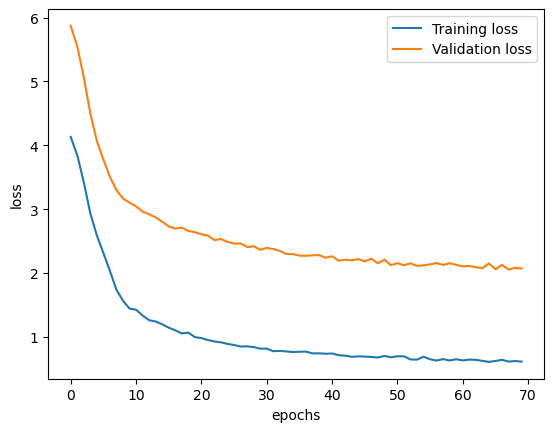

In [33]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

## Training data prediction

### Make predictions of the error

In [34]:
predictions=model.predict(trainX)

48/48 [==============================] - 0s 2ms/step


### Add predicted error to output mechanistic model

In [35]:
# Select the NO3 mechanistic model output for the training period
output_TSS=mech_model_output_data['.SST_1.X_Layer(1)']
training_mech_output_TSS=output_TSS.loc[tr1:tr2] # first one not included because this doesn't get predicted 
training_mech_output_TSS=np.array(training_mech_output_TSS.iloc[n_past:])

# Add predicted error to output mechanistic model
training_hybrid_output_TSS=np.asarray(predictions).reshape(len(predictions),)+ training_mech_output_TSS

for i in range(0, len(training_hybrid_output_TSS)):
    if training_hybrid_output_TSS[i] < 0:
        training_hybrid_output_TSS[i] = 0

# Select the measured NO3 for the training period
training_measured_TSS=measured_data['.SST_1.X_Out'].loc[tr1:tr2]
training_measured_TSS=np.array(training_measured_TSS.iloc[n_past:])

### Check results training dataset prediction

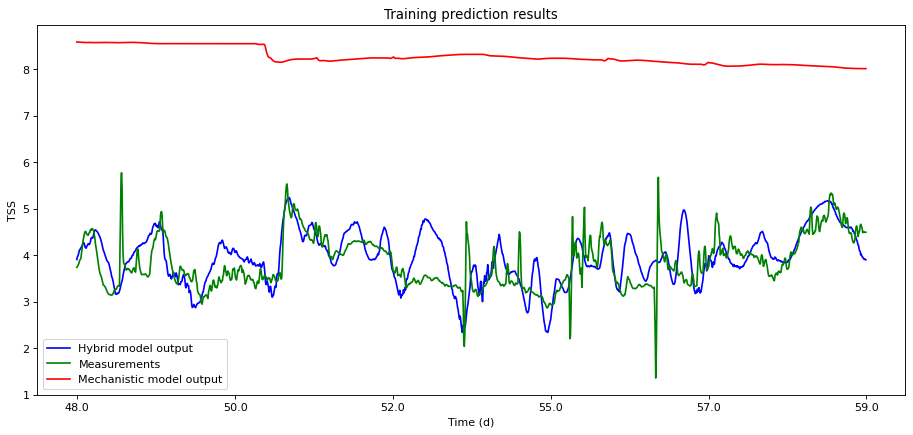

In [36]:
figure(figsize=(14, 6), dpi=80)
plt.plot(training_hybrid_output_TSS,'b',label='Hybrid model output')
plt.plot(training_measured_TSS, 'g', label='Measurements')
plt.plot(training_mech_output_TSS, 'r', label='Mechanistic model output')
plt.xticks(ticks=np.linspace(1,len(training_hybrid_output_TSS), 6) , labels=np.around(np.linspace(float(trainX_temp.index[1]), float(trainX_temp.index[-1]), 6)))
plt.legend()
plt.xlabel('Time (d)')
plt.ylabel('TSS')
plt.title('Training prediction results')
plt.savefig('training.png')

# Experiment.log_figure(experiment, figure_name='training results')

In [37]:
print('Training prediction results')
mse_hybrid_tr = sklearn.metrics.mean_squared_error(training_measured_TSS, training_hybrid_output_TSS)  
rmse_hybrid_tr = math.sqrt(mse_hybrid_tr)  

print("Hybrid model: MSE:", mse_hybrid_tr)
print("Hybrid model: RMSE:", rmse_hybrid_tr)  

mse_mech_tr = sklearn.metrics.mean_squared_error(training_measured_TSS, training_mech_output_TSS)  
rmse_mech_tr = math.sqrt(mse_mech_tr)  

print("Mechanistic model: MSE:", mse_mech_tr)
print("Mechanistic model: RMSE:", rmse_mech_tr)

Training prediction results
Hybrid model: MSE: 0.24400598143766025
Hybrid model: RMSE: 0.493969615905331
Mechanistic model: MSE: 20.049769505360022
Mechanistic model: RMSE: 4.477696897441811


## Validation data prediction

### Make prediction of the errors

In [38]:
predictions_val=model.predict(validationX)

101/101 [==============================] - 0s 2ms/step


### Add predicted error to output mechanistic model

In [39]:
# Select the NO3 mechanistic model output for the validation period
output_TSS=mech_model_output_data['.SST_1.X_Layer(1)']
validation_mech_output_TSS=output_TSS.loc[v1:v2] 
validation_mech_output_TSS=np.array(validation_mech_output_TSS.iloc[n_past:])

# Add predicted error to output mechanistic model
validation_hybrid_output_TSS=np.asarray(predictions_val).reshape(len(predictions_val),) + validation_mech_output_TSS
for i in range(0, len(validation_hybrid_output_TSS)):
    if validation_hybrid_output_TSS[i] < 0:
        validation_hybrid_output_TSS[i] = 0

# Select the measured NO3 for the validation period
validation_measured_TSS=measured_data['.SST_1.X_Out'][v1:v2]
validation_measured_TSS=np.array(validation_measured_TSS.iloc[n_past:])

### Check results validation dataset prediction

Text(0.5, 1.0, 'Validation period')

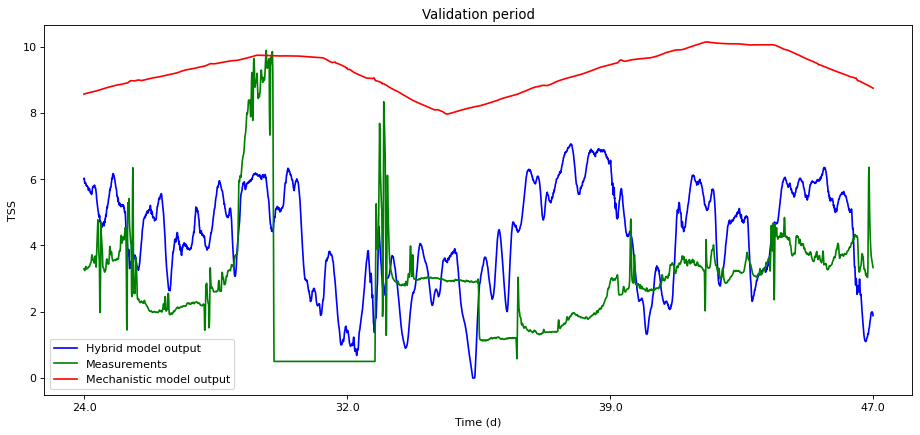

In [40]:
figure(figsize=(14, 6), dpi=80)

plt.plot(validation_hybrid_output_TSS,'b',label='Hybrid model output')
plt.plot(validation_measured_TSS, 'g', label='Measurements')
plt.plot(validation_mech_output_TSS, 'r', label='Mechanistic model output')
plt.xticks(ticks=np.linspace(1, len(validation_hybrid_output_TSS),4) , labels=np.around(np.linspace(float(validationX_temp.index[1]), float(validationX_temp.index[-1]), 4)))
plt.legend()
plt.xlabel('Time (d)')
plt.ylabel('TSS')
plt.title('Validation period')

# Experiment.log_figure(experiment,figure_name='validation results')

In [41]:
print('Validation results')
mse_hybrid_val = sklearn.metrics.mean_squared_error(validation_measured_TSS, validation_hybrid_output_TSS)  
rmse_hybrid_val = math.sqrt(mse_hybrid_val)  

print("Hybrid model: MSE:", mse_hybrid_val)
print("Hybrid model: RMSE:", rmse_hybrid_val)  

mse_mech_val = sklearn.metrics.mean_squared_error(validation_measured_TSS, validation_mech_output_TSS)  
rmse_mech_val = math.sqrt(mse_mech_val)  

print("Mechanistic model: MSE:", mse_mech_val)
print("Mechanistic model: RMSE:", rmse_mech_val)

Validation results
Hybrid model: MSE: 6.23274312650265
Hybrid model: RMSE: 2.4965462396083615
Mechanistic model: MSE: 44.08106506366558
Mechanistic model: RMSE: 6.63935727790466


## Test data prediction

### Make prediction of the errors

In [42]:
predictions_test=model.predict(testX)

84/84 [==============================] - 0s 2ms/step


### Add predicted error to output mechanistic model

In [43]:
# Select the NO3 mechanistic model output for the validation period
output_TSS=mech_model_output_data['.SST_1.X_Layer(1)']
test_mech_output_TSS=output_TSS[te1:te2] 
test_mech_output_TSS=np.array(test_mech_output_TSS.iloc[n_past:])

# Add predicted error to output mechanistic model
test_hybrid_output_TSS=np.asarray(predictions_test).reshape(len(predictions_test) ,) + test_mech_output_TSS
for i in range(0, len(test_hybrid_output_TSS)):
    if test_hybrid_output_TSS[i] < 0:
        test_hybrid_output_TSS[i] = 0
        
# Select the measured NO3 for the validation period
test_measured_TSS=measured_data['.SST_1.X_Out'][te1:te2]
test_measured_TSS=np.array(test_measured_TSS.iloc[n_past:])

### Check results test dataset prediction

Text(0.5, 1.0, 'Test period')

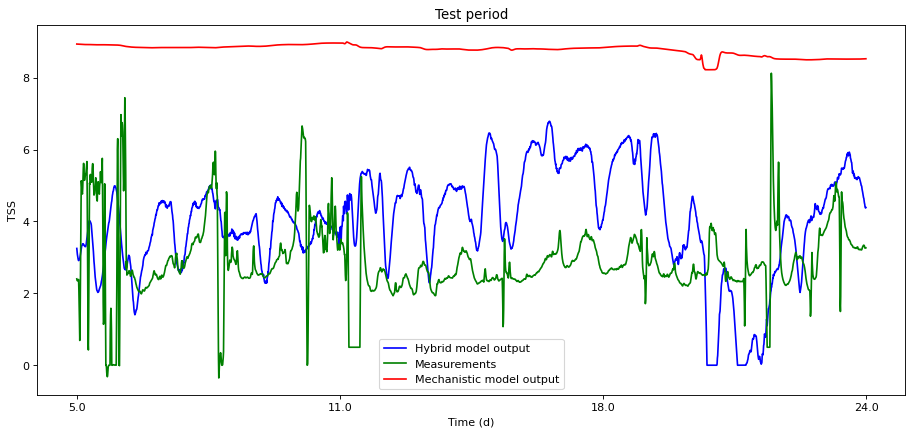

In [44]:
figure(figsize=(14, 6), dpi=80)

plt.plot(test_hybrid_output_TSS,'b',label='Hybrid model output')
plt.plot(test_measured_TSS, 'g', label='Measurements')
plt.plot(test_mech_output_TSS, 'r', label='Mechanistic model output')
plt.xticks(ticks=np.linspace(1,len(test_hybrid_output_TSS),4) , labels=np.around(np.linspace(float(testX_temp.index[1]), float(testX_temp.index[-1]), 4)))
plt.legend()
plt.xlabel('Time (d)')
plt.ylabel('TSS')
plt.title('Test period')

# Experiment.log_figure(experiment,figure_name='test results')


#shapley values (code van Ward)
#matlab ook eens bekijken -> eerst doen
#gamze met default parameters (Elena bekijkt kalibratieprocedure)
#marcello's data gebruiken? -> eens vragen of we data mogen gebruiken
#Christian -> hyperparametertraining
#drop is niet natuurlijk

#nadien serie model (als parallel redelijk werkt)

In [45]:
print('Validation results')
mse_hybrid_te = sklearn.metrics.mean_squared_error(test_measured_TSS, test_hybrid_output_TSS)  
rmse_hybrid_te = math.sqrt(mse_hybrid_te)  

print("Hybrid model: MSE:", mse_hybrid_te)
print("Hybrid model: RMSE:", rmse_hybrid_te)  

mse_mech_te = sklearn.metrics.mean_squared_error(test_measured_TSS, test_mech_output_TSS)  
rmse_mech_te = math.sqrt(mse_mech_te)  

print("Mechanistic model: MSE:", mse_mech_te)
print("Mechanistic model: RMSE:", rmse_mech_te)

Validation results
Hybrid model: MSE: 4.488557415257092
Hybrid model: RMSE: 2.1186215837796736
Mechanistic model: MSE: 35.75385161299981
Mechanistic model: RMSE: 5.979452450935605


In [46]:
# experiment.end()

(0.0, 11.0)

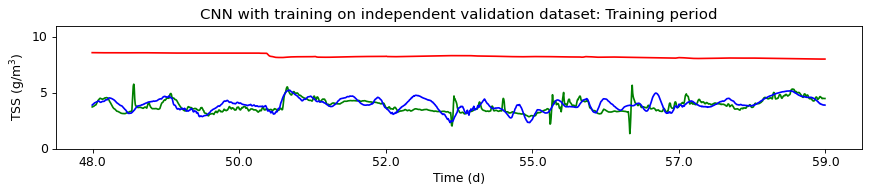

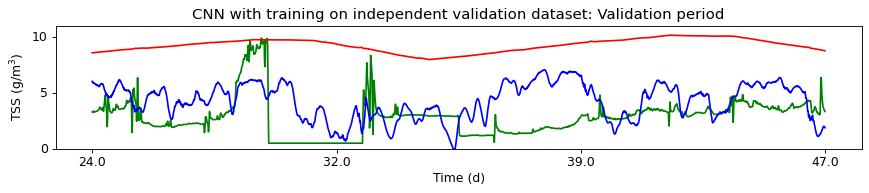

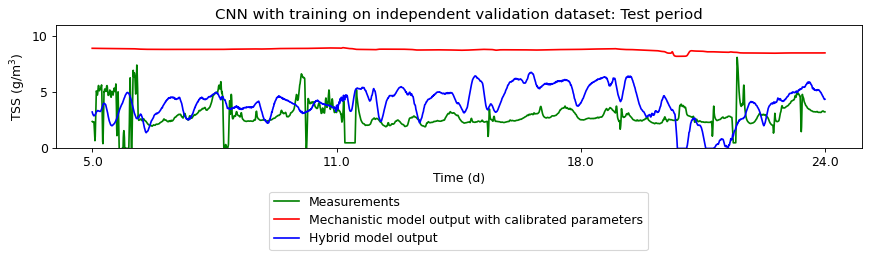

In [47]:
plt.rcParams.update({'font.size': 11.2})

figure(figsize=(13,2), dpi=80)
plt.plot(training_measured_TSS, 'g', label='Measurements')
plt.plot(training_mech_output_TSS, 'r', label='Mechanistic model output with calibrated parameters')
plt.plot(training_hybrid_output_TSS,'b', label='Hybrid model output')
plt.xticks(ticks=np.linspace(1,len(training_hybrid_output_TSS), 6) , labels=np.around(np.linspace(float(trainX_temp.index[1]), float(trainX_temp.index[-1]), 6)))
plt.xlabel('Time (d)')
plt.ylabel(r'TSS (g/m$^3$)')
plt.title('CNN with training on independent validation dataset: Training period')
plt.ylim([0,11])

figure(figsize=(13,2), dpi=80)
plt.plot(validation_measured_TSS, 'g', label='Measurements')
plt.plot(validation_mech_output_TSS, 'r', label='Mechanistic model output with calibrated parameters')
plt.plot(validation_hybrid_output_TSS,'b',label='Hybrid model output')
plt.xticks(ticks=np.linspace(1, len(validation_hybrid_output_TSS),4) , labels=np.around(np.linspace(float(validationX_temp.index[1]), float(validationX_temp.index[-1]), 4)))
plt.xlabel('Time (d)')
plt.ylabel(r'TSS (g/m$^3$)')
plt.title('CNN with training on independent validation dataset: Validation period')
plt.ylim([0,11])

figure(figsize=(13,2), dpi=80)
plt.plot(test_measured_TSS, 'g', label='Measurements')
plt.plot(test_mech_output_TSS, 'r', label='Mechanistic model output with calibrated parameters')
plt.plot(test_hybrid_output_TSS,'b',label='Hybrid model output')
plt.xticks(ticks=np.linspace(1,len(test_hybrid_output_TSS),4) , labels=np.around(np.linspace(float(testX_temp.index[1]), float(testX_temp.index[-1]), 4)))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=1)
plt.xlabel('Time (d)')
plt.ylabel(r'TSS (g/m$^3$)')
plt.title('CNN with training on independent validation dataset: Test period')
plt.ylim([0,11])

# Metrics

In [48]:
print('TSS: CNN exp2')
print('\nTraining prediction results')
mse_hybrid_tr = sklearn.metrics.mean_squared_error(training_measured_TSS, training_hybrid_output_TSS)  
rmse_hybrid_tr = math.sqrt(mse_hybrid_tr)  

print("Hybrid model: RMSE:", rmse_hybrid_tr)  

mse_mech_tr = sklearn.metrics.mean_squared_error(training_measured_TSS, training_mech_output_TSS)  
rmse_mech_tr = math.sqrt(mse_mech_tr) 

print("Mechanistic model: RMSE:", rmse_mech_tr)

#___________________________________________________________________________________

print('\nValidation results')
mse_hybrid_val = sklearn.metrics.mean_squared_error(validation_measured_TSS,validation_hybrid_output_TSS)  
rmse_hybrid_val = math.sqrt(mse_hybrid_val)  

print("Hybrid model: RMSE:", rmse_hybrid_val)

mse_mech_val = sklearn.metrics.mean_squared_error(validation_measured_TSS, validation_mech_output_TSS)  
rmse_mech_val = math.sqrt(mse_mech_val)

print("Mechanistic model: RMSE:", rmse_mech_val)

#___________________________________________________________________________________
print('\nTest results')
mse_hybrid_te = sklearn.metrics.mean_squared_error(test_measured_TSS, test_hybrid_output_TSS)  
rmse_hybrid_te = math.sqrt(mse_hybrid_te)  

print("Hybrid model: RMSE:", rmse_hybrid_te)  

mse_mech_te = sklearn.metrics.mean_squared_error(test_measured_TSS, test_mech_output_TSS)  
rmse_mech_te = math.sqrt(mse_mech_te)

print("Mechanistic model: RMSE:", rmse_mech_te)



TSS: CNN exp2

Training prediction results
Hybrid model: RMSE: 0.493969615905331
Mechanistic model: RMSE: 4.477696897441811

Validation results
Hybrid model: RMSE: 2.4965462396083615
Mechanistic model: RMSE: 6.63935727790466

Test results
Hybrid model: RMSE: 2.1186215837796736
Mechanistic model: RMSE: 5.979452450935605
